## 보험료 예측 실습

**[EDA 체크리스트]**

1. 어떤 질문을 풀거나 틀렸다고 증명하려고 하는가?
    - 보험사 고객 정보를 통해 보험료 예측 모델을 생성하려고 한다.
2. 중복된 항목은 있는가?
3. 어떤 종류의 데이터가 있으며 다른 데이터 타입들을 어떻게 다루려고 하는가?
4. 데이터에서 누락된 것이 있는지, 있다면 그것들을 어떻게 처리하려는가?
5. 이상치는 어디에 있는가? 관심을 가져야 할 데이터인가?
	- 각 변수들의 분포, 치우침 정도(왜도)를 확인하고 log처리할 것인지 선택하여라
6. 변수 간 상관성이 있는가?

**[모델링 체크리스트]**

1. 어떠한 지도학습이 적합한가? (분류 vs 회귀)
2. 선택한 지도학습 모델 중에서 3가지 이상을 골라서 성능을 비교해보자. 
3. 성능을 확인하고 어떠한 모델을 사용했을 때 예측이 잘되었는지 평가지표와 함께 기록해보자.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./premium.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1333 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1333.000000,1338.000000,1338.000000
mean,39.207025,30.658545,1.094918,13270.422265
std,14.049960,6.092785,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.675000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# 중복 데이터 확인 및 제거
df[df.duplicated(keep=False)]
df = df.drop_duplicates()

In [7]:
# 컬럼별 결측치 여부 확인
df.isnull().sum()

age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# bmi 결측치 평균값으로 채우기
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.isnull().sum()

/var/folders/s2/kqf29pt97w527q67cq0htzc80000gn/T/ipykernel_21567/464883109.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# 범주형 데이터를 sklearn label encoder 이용해서 수치화

from sklearn.preprocessing import LabelEncoder

col_lst = ['sex', 'smoker', 'region']

def lb_encoding(df=df, col_lst=col_lst):
	for col in col_lst:
		encoder = LabelEncoder()
		df[col] = encoder.fit_transform(df[col])

lb_encoding()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
# # 나이대별로 범주화
# df.loc[df['age'] < 20, 'age'] = 10
# df.loc[(df['age'] >= 20) & (df['age'] < 30), 'age'] = 20
# df.loc[(df['age'] >= 30) & (df['age'] < 40), 'age'] = 30
# df.loc[(df['age'] >= 40) & (df['age'] < 50), 'age'] = 40
# df.loc[(df['age'] >= 50) & (df['age'] < 60), 'age'] = 50
# df.loc[df['age'] >= 60, 'age'] = 60

# df['age'].value_counts()


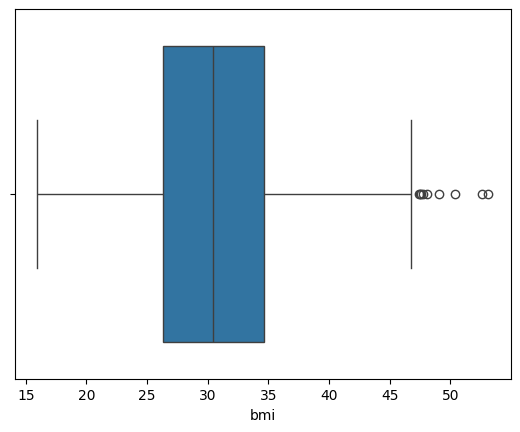

In [11]:
# bmi 이상치 확인하기

sns.boxplot(data=df, x='bmi')
plt.show()

In [12]:
df.loc[df['bmi'] > 47]

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,0,2,11381.32540
286,46,0,48.07,2,0,0,9432.92530
401,47,1,47.52,1,0,2,8083.91980
543,54,0,47.41,0,1,2,63770.42801
847,23,1,50.38,1,0,2,2438.05520
860,37,0,47.60,2,1,3,46113.51100
1047,22,1,52.58,1,1,2,44501.39820
1088,52,1,47.74,1,0,2,9748.91060
1317,18,1,53.13,0,0,2,1163.46270


In [13]:
def metrics(model, y_tst, pred):
		mae = mean_absolute_error(y_tst, pred)
		mse = mean_squared_error(y_tst, pred)
		rmse = np.sqrt(mse)
		r2 = r2_score(y_tst, pred)
		
		return f'{model} MAE : {round(mae, 4)}, RMSE : {round(rmse, 4)}, R2 : {round(r2, 4)}'
	

In [14]:

def model_predict(model_lst, x_trn, x_tst, y_trn, y_tst):
		
	for model in model_lst:
		model.fit(x_trn, y_trn)
		pred = model.predict(x_tst)
		result = metrics(model, y_tst, pred)
		print(result)


# DataFrame 전체 Scailing

## Standard Scaler

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

x = df_scaled[:, :-1]
y = df_scaled[:, -1]

x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size=0.2, random_state=0)


lr_reg = LinearRegression()
rf_reg = RandomForestRegressor()
ridge = Ridge()
lasso = Lasso()


model_lst = [lr_reg, rf_reg, ridge, lasso]
model_predict(model_lst, x_trn, x_tst, y_trn, y_tst)

LinearRegression() MAE : 0.3641, RMSE : 0.5347, R2 : 0.7509
RandomForestRegressor() MAE : 0.2437, RMSE : 0.4353, R2 : 0.8349
Ridge() MAE : 0.3642, RMSE : 0.5348, R2 : 0.7509
Lasso() MAE : 0.8184, RMSE : 1.0744, R2 : -0.0057


## MinMax Scaler

In [16]:
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)

x = df_scaled[:, :-1]
y = df_scaled[:, -1]

x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size=0.2, random_state=0)


lr_reg = LinearRegression()
rf_reg = RandomForestRegressor()
ridge = Ridge()
lasso = Lasso()


model_lst = [lr_reg, rf_reg, ridge, lasso]
model_predict(model_lst, x_trn, x_tst, y_trn, y_tst)

LinearRegression() MAE : 0.0704, RMSE : 0.1033, R2 : 0.7509
RandomForestRegressor() MAE : 0.0469, RMSE : 0.0843, R2 : 0.8344
Ridge() MAE : 0.0704, RMSE : 0.1035, R2 : 0.7499
Lasso() MAE : 0.1582, RMSE : 0.2076, R2 : -0.0057


# Train, Test 따로 Scailing

## Standard Scaler

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler


x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size=0.2, random_state=0)

scaler = StandardScaler()

scaled_x_trn = scaler.fit_transform(x_trn)
scaled_x_tst = scaler.transform(x_tst)

scaled_y_trn = scaler.fit_transform(y_trn.values.reshape(-1,1)).flatten()
scaled_y_tst = scaler.transform(y_tst.values.reshape(-1,1)).flatten()


scaled_y_tst = scaler.transform(y_tst.values.reshape(-1,1))

lr_reg = LinearRegression()
rf_reg = RandomForestRegressor()
ridge = Ridge()
lasso = Lasso()


model_lst = [lr_reg, rf_reg, ridge, lasso]
model_predict(model_lst, scaled_x_trn, scaled_x_tst, scaled_y_trn, scaled_y_tst)

LinearRegression() MAE : 0.3713, RMSE : 0.5453, R2 : 0.7509
RandomForestRegressor() MAE : 0.2496, RMSE : 0.4443, R2 : 0.8346
Ridge() MAE : 0.3714, RMSE : 0.5453, R2 : 0.7509
Lasso() MAE : 0.8346, RMSE : 1.0957, R2 : -0.0057


## MinMax Scaler

In [18]:
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)

x = df_scaled[:, :-1]
y = df_scaled[:, -1]

x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size=0.2, random_state=0)


lr_reg = LinearRegression()
rf_reg = RandomForestRegressor()
ridge = Ridge()
lasso = Lasso()


model_lst = [lr_reg, rf_reg, ridge, lasso]
model_predict(model_lst, x_trn, x_tst, y_trn, y_tst)

LinearRegression() MAE : 0.0704, RMSE : 0.1033, R2 : 0.7509
RandomForestRegressor() MAE : 0.047, RMSE : 0.0842, R2 : 0.8345
Ridge() MAE : 0.0704, RMSE : 0.1035, R2 : 0.7499
Lasso() MAE : 0.1582, RMSE : 0.2076, R2 : -0.0057
